# Implementation of Section 4.3
Sensitivity analysis

In [1]:
from data_preparation import DataPreparation
import custom_func
from model import Model
from model_w import ModelW
from draw_network import DrawNetworkDiagram

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
spill_data = pd.read_excel('../data/processed/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()
potential_station_data = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
potential_station_data = potential_station_data.iloc[[0, 4,7, 10, 11, 18]] # if we want to keep current facility setup in the set
station_data = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
current_station_data = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current', header=0).copy()

current_input_param = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current input param', header=0).copy()
input_parameters = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='Estimated parameters', header=0).copy()
sensitivity_dataR = gpd.read_file('../data/gis map/ArcGIS_data/Sensitivity_data/Sensitivity_data5.shp').copy()

In [3]:
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
spill_coord = pd.DataFrame(coordinates_spill[1]).T.reset_index().set_index('index')
spill_coord.columns = ['St_Latitude', 'St_Longitude']

# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= DataPreparation.generate_input_data(potential_station_data, spill_data, input_parameters)
Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

['s1', 's5', 's8', 's11', 's12', 's19']


# Table 5 

## 200 spills

In [4]:
spill_data200 = pd.read_csv('../data/processed/data_200_oil_spills.csv')

In [5]:
# Spill data processing
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= DataPreparation.generate_input_data(station_data, spill_data, input_parameters)
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
coordinates_st = custom_func.extract_station_coordinate(station_data)
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20']


In [6]:
# normalize  # (x_0-x_min)/(x_max-x_min)
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))
Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))


In [7]:
NumberStMaxL = [15, 12, 8, 5, 4, 2]
number_of_spillsL = [200, 200, 200, 200, 200, 200]
select_1sL =[]
coverage_percentageL =[]
MeanResponseTimeL =[]
DistanceMax = 10

BigM = 10**20
current_vs_proposed = 'proposed' # current
MaxFO = 1
Budget = 10**12
W = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
QuantityMin = 2

In [8]:
for i in range(len(NumberStMaxL)):
    model01, select, deploy, mvars, names, values, objValues, \
            spill_df, station_df, cover_1s, select_1s, deploy_1s, MeanResponseTime, coverage_percentage, assignment  \
        = Model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
              Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMaxL[i], Distance, Distance_n,
              W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
              BigM, MaxFO)
    select_1sL.append(select_1s.index)
    coverage_percentageL.append(coverage_percentage)
    MeanResponseTimeL.append(MeanResponseTime)


--------------MIP-moo--------
Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-03
Problem has 2 objectives
Gurobi found 6 solutions
Solution 0 :  1149.38   -10611.18 Solution 1 :  1149.38   -10254.34 Solution 2 :  1149.42   -9929.69 Solution 3 :  1149.48   -8818.08 Solution 4 :  1149.48   2425.0 Solution 5 :  1149.01   2375.0 Solution 0 :Solution 1 :Solution 2 :Solution 3 :Solution 4 :Solution 5 :Coverage Percentage: 99%
Mean Response Time: 7.95
--------------MIP-moo--------
Problem has 2 objectives
Gurobi found 6 solutions
Solution 0 :  1149.34   -9204.39 Solution 1 :  1149.4   -8891.99 Solution 2 :  1149.38   -8502.71 Solution 3 :  1149.45   -7391.1 Solution 4 :  1149.45   1950.0 Solution 5 :  1148.84   1900.0 Solution 0 :Solution 1 :Solution 2 :Solution 3 :Solution 4 :Solution 5 :Coverage Percentage: 99%
Mean Response Time: 7.83
--------------MIP-moo--------
Problem has 2 objectives
Gurobi found 4 solutions
Solution 0 :  1149.17   -6810.97 Solu

In [9]:
determine_number_of_facilities = pd.DataFrame(index=range(len(NumberStMaxL)),
                                              columns=['Number of facilities', 'Number of spills','Open facility', 'Coverage (%)', 'Mean Response time (in hours)', 'Cost investment (in million CAD)'])
for i in range(6):
    determine_number_of_facilities.iloc[i,0] = NumberStMaxL[i]
    determine_number_of_facilities.iloc[i,1] = number_of_spillsL[i]
    determine_number_of_facilities.iloc[i,2] = select_1sL[i]
    determine_number_of_facilities.iloc[i,3] = coverage_percentageL[i]
    determine_number_of_facilities.iloc[i,4] = MeanResponseTimeL[i]
    determine_number_of_facilities.iloc[i,5] = 0
determine_number_of_facilities

,Number of facilities,Number of spills,Open facility,Coverage (%),Mean Response time (in hours),Cost investment (in million CAD)
0,15,200,"Index(['s20', 's13', 's12', 's4', 's19', 's16'...",99,7.95,0
1,12,200,"Index(['s13', 's12', 's4', 's19', 's16', 's2',...",99,7.83,0
2,8,200,"Index(['s20', 's12', 's4', 's16', 's2', 's1', ...",99,7.39,0
3,5,200,"Index(['s7', 's13', 's19', 's2', 's1'], dtype=...",96,7.63,0
4,4,200,"Index(['s7', 's13', 's19', 's1'], dtype='object')",78,7.94,0
5,2,200,"Index(['s12', 's1'], dtype='object')",44,7.22,0


## 100 Spills

In [10]:
NumberStMaxL = [15, 12, 8, 5, 4, 2]
number_of_spillsL = [100, 100,100, 100,100, 100]
select_1sL =[]
coverage_percentageL =[]
MeanResponseTimeL =[]

In [11]:
for i in range(6):
    model01, select, deploy, mvars, names, values, objValues, \
            spill_df, station_df, cover_1s, select_1s, deploy_1s, MeanResponseTime, coverage_percentage, assignment  \
        = Model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
              Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMaxL[i], Distance, Distance_n,
              W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
              BigM, MaxFO)
    select_1sL.append(select_1s.index)
    coverage_percentageL.append(coverage_percentage)
    MeanResponseTimeL.append(MeanResponseTime)


--------------MIP-moo--------
Problem has 2 objectives
Gurobi found 6 solutions
Solution 0 :  1149.38   -10611.18 Solution 1 :  1149.38   -10254.34 Solution 2 :  1149.42   -9929.69 Solution 3 :  1149.48   -8818.08 Solution 4 :  1149.48   2425.0 Solution 5 :  1149.01   2375.0 Solution 0 :Solution 1 :Solution 2 :Solution 3 :Solution 4 :Solution 5 :Coverage Percentage: 99%
Mean Response Time: 7.95
--------------MIP-moo--------
Problem has 2 objectives
Gurobi found 6 solutions
Solution 0 :  1149.34   -9204.39 Solution 1 :  1149.4   -8891.99 Solution 2 :  1149.38   -8502.71 Solution 3 :  1149.45   -7391.1 Solution 4 :  1149.45   1950.0 Solution 5 :  1148.84   1900.0 Solution 0 :Solution 1 :Solution 2 :Solution 3 :Solution 4 :Solution 5 :Coverage Percentage: 99%
Mean Response Time: 7.83
--------------MIP-moo--------
Problem has 2 objectives
Gurobi found 4 solutions
Solution 0 :  1149.17   -6810.97 Solution 1 :  1149.28   -5592.99 Solution 2 :  1149.28   1400.0 Solution 3 :  1110.23   1175.0 

In [12]:
determine_number_of_facilities = pd.DataFrame(index=range(6),
                                              columns=['Number of facilities', 'Number of spills','Open facility', 'Coverage (%)', 'Mean Response time (in hours)', 'Cost investment (in million CAD)'])
for i in range(6):
    determine_number_of_facilities.iloc[i,0] = NumberStMaxL[i]
    determine_number_of_facilities.iloc[i,1] = number_of_spillsL[i]
    determine_number_of_facilities.iloc[i,2] = select_1sL[i]
    determine_number_of_facilities.iloc[i,3] = coverage_percentageL[i]
    determine_number_of_facilities.iloc[i,4] = MeanResponseTimeL[i]
    determine_number_of_facilities.iloc[i,5] = 0
determine_number_of_facilities

,Number of facilities,Number of spills,Open facility,Coverage (%),Mean Response time (in hours),Cost investment (in million CAD)
0,15,100,"Index(['s20', 's13', 's12', 's4', 's19', 's16'...",99,7.95,0
1,12,100,"Index(['s13', 's12', 's4', 's19', 's16', 's2',...",99,7.83,0
2,8,100,"Index(['s20', 's12', 's4', 's16', 's2', 's1', ...",99,7.39,0
3,5,100,"Index(['s7', 's13', 's19', 's2', 's1'], dtype=...",96,7.63,0
4,4,100,"Index(['s7', 's13', 's19', 's1'], dtype='object')",78,7.94,0
5,2,100,"Index(['s12', 's1'], dtype='object')",44,7.22,0


# Fig8: PCP

In [13]:
data_weight_pcp = pd.read_excel('../data/processed/data_weight_pcp.xlsx')
data_co_sorted = data_weight_pcp.sort_values(['coverage_percentage'], ascending=False)
data_MeanRT_sorted = data_weight_pcp.sort_values(['MeanResponseTime'], ascending=False)
data_cost_sorted = data_weight_pcp.sort_values(['objValues2'], ascending=False)

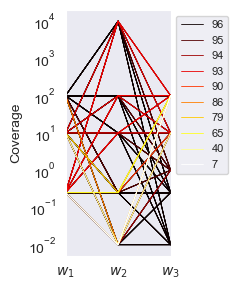

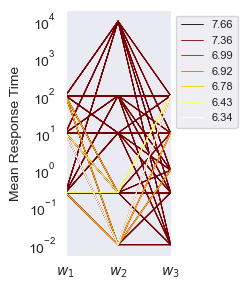

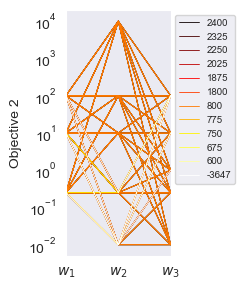

In [14]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(2,3))
kwargs = {'lw':0.6} #'alpha':1,
ax = pd.plotting.parallel_coordinates(data_co_sorted, class_column='coverage_percentage',
                                 cols=['w1','w2', 'w3'],
                                 colormap=plt.get_cmap('hot'),
                                axvlines=False,
                                 **kwargs                      )
plt.yscale("log")
plt.ylabel('Coverage', fontsize=10)
plt.yticks(fontsize=10)
ax.set_xticklabels(['$w_1$', '$w_2$', '$w_3$'])
plt.tight_layout()
ax.legend(bbox_to_anchor=(1,1), fontsize = 8)
ax.grid(False)
fig.savefig(f'../plots/Fig8a PCP.png', transparent=False, dpi=400, bbox_inches = "tight")

fig, ax = plt.subplots(figsize=(2,3))
kwargs = {'lw':0.6} #'alpha':1,
ax = pd.plotting.parallel_coordinates(data_MeanRT_sorted, class_column='MeanResponseTime',
                                 cols=['w1','w2', 'w3'],
                                 colormap=plt.get_cmap('hot'),axvlines=False,
                                 **kwargs                      )
plt.yscale("log")
plt.ylabel('Mean Response Time', fontsize=10)
plt.yticks(fontsize=10)
ax.set_xticklabels(['$w_1$', '$w_2$', '$w_3$'])
plt.tight_layout()
ax.legend(bbox_to_anchor=(1,1), fontsize = 8)
ax.grid(False)
fig.savefig(f'../plots/Fig8b PCP.png', transparent=False, dpi=400, bbox_inches = "tight")

fig, ax = plt.subplots(figsize=(2,3))
kwargs = {'lw':0.6} #'alpha':1,
ax = pd.plotting.parallel_coordinates(data_cost_sorted, class_column='objValues2',
                                 cols=['w1','w2', 'w3'],
                                 colormap=plt.get_cmap('hot'),axvlines=False,
                                 **kwargs                      )
plt.yscale("log")
plt.ylabel('Objective 2', fontsize=10)
plt.yticks(fontsize=10)
ax.set_xticklabels(['$w_1$', '$w_2$', '$w_3$'])
plt.tight_layout()
ax.legend(bbox_to_anchor=(1,1), fontsize = 7)
ax.grid(False)
fig.savefig(f'../plots/Fig8c PCP.png', transparent=False, dpi=400, bbox_inches = "tight")

# Fig9: Emphasize sensitivity

In [15]:
BigM = 10**20
current_vs_proposed = 'proposed' # current
MaxFO = 1
Budget = 10**12
W = [0.25, 1000*0.25, 0.25, 10**-4*0.25, 10**-2*0.25, 10 * 0.25]
QuantityMin = 2

In [16]:
DistanceMaxL = [5, 7, 8, 10, 11, 12, 15, 20]
NumberStMaxL = [2, 5, 8, 10, 12]
select_1sL =[]
coverage_percentageL =[]
MeanResponseTimeL =[]
max_distance_sensitivity_L = []

In [17]:
# Model
for i in range(len(DistanceMaxL)):
    for j in range(len(NumberStMaxL)):
        model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
            spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
            = ModelW.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
                  Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMaxL[j], Distance, Distance_n,
                  W, QuantityMin, DistanceMaxL[i], Cf_s, CostU, Budget,
                  BigM, MaxFO)
        select_1sL.append(select_1s_m4b.index)
        coverage_percentageL.append(coverage_percentage_m4b)
        MeanResponseTimeL.append(MeanResponseTime_m4b)
        max_distance_sensitivity_L.append([DistanceMaxL[i], NumberStMaxL[j], MeanResponseTime_m4b])

--------------MIP-moo--------
Set parameter PoolSolutions to value 1024
Set parameter PoolGap to value 0.8
Set parameter LogFile to value "../models/model_moo(May 05).log"
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.2.0 23C71)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 616 rows, 466 columns and 1180 nonzeros
Model fingerprint: 0x2cfb3601
Variable types: 336 continuous, 130 integer (130 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+25]
  Objective range  [3e-02, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------

Multi-object

--------------MIP-moo--------
Set parameter PoolSolutions to value 1024
Set parameter PoolGap to value 0.8
Set parameter LogFile to value "../models/model_moo(May 05).log"
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.2.0 23C71)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 616 rows, 466 columns and 1180 nonzeros
Model fingerprint: 0xe5d1e610
Variable types: 336 continuous, 130 integer (130 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+25]
  Objective range  [3e-02, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------

Multi-object

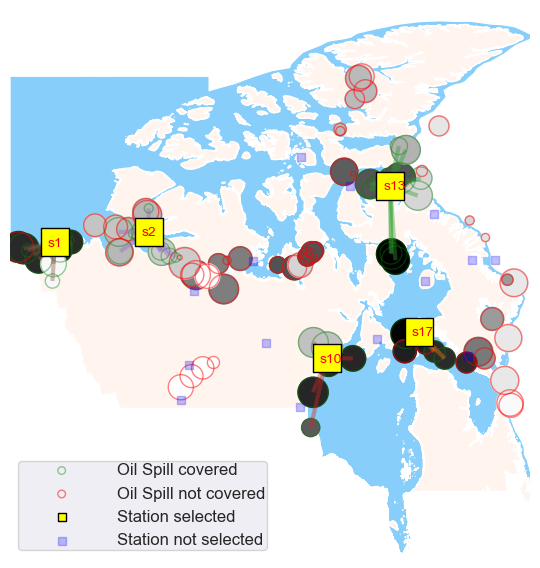

In [18]:
model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
    spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
    = ModelW.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMaxL[1], Distance, Distance_n,
          W, QuantityMin, DistanceMaxL[0], Cf_s, CostU, Budget,
          BigM, MaxFO)
select_1sL.append(select_1s_m4b.index)
coverage_percentageL.append(coverage_percentage_m4b)
MeanResponseTimeL.append(MeanResponseTime_m4b)
max_distance_sensitivity_L.append([DistanceMaxL[0], NumberStMaxL[1], MeanResponseTime_m4b])

# Draw the network
assignment_line_m4b = DrawNetworkDiagram.draw_network_diagram(DistanceMaxL[0], NumberStMaxL[1], Sensitivity_R, spill_df_m4b, station_df_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b, deploy_1s_m4b, select_1s_m4b, current_vs_proposed)

In [19]:
max_distance_sensitivity_df = pd.DataFrame(max_distance_sensitivity_L,
                                              columns=['Max Distance Travelled','Max Number of Station','Mean Response Time'])
max_distance_sensitivity_df

,Max Distance Travelled,Max Number of Station,Mean Response Time
0,5,2,3.68
1,5,5,3.64
2,5,8,3.70
3,5,10,3.80
4,5,12,3.76
5,7,2,4.55
6,7,5,5.48
7,7,8,5.70
8,7,10,5.61
9,7,12,5.54


# Fig10: Boxplot 
Boxplot - compare coverage, cost, time for current vs proposed

In [20]:
data_compare = pd.read_excel('../data/processed/Boxplot_data.xlsx', sheet_name='Sheet1', skiprows=[0])
data_compare.info()
coverage_df_stacked = data_compare[['Current','Proposed']].copy().stack().reset_index()
coverage_df_stacked.columns = ['Index','Facility','Coverage']
cost_df_stacked = data_compare[['Current.1','Proposed.1']].copy().stack().reset_index()
cost_df_stacked.columns = ['Index','Facility','Cost']

time_df_stacked = data_compare[['Current.2','Proposed.2']].copy().stack().reset_index()
time_df_stacked.columns = ['Index','Facility','Response Time']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Spill sets  10 non-null     object 
 1   Current     10 non-null     int64  
 2   Proposed    10 non-null     int64  
 3   Current.1   10 non-null     float64
 4   Proposed.1  10 non-null     float64
 5   Current.2   10 non-null     float64
 6   Proposed.2  10 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 692.0+ bytes


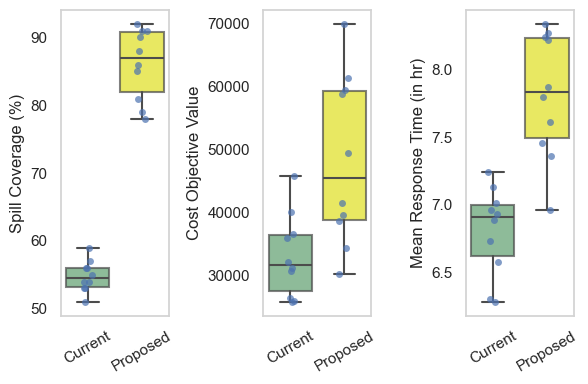

In [21]:
sns.set_theme(style="white")
plt.rcParams['axes.edgecolor'] = 'lightgray'

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(6,4))
alpha_val = 0.7

sns.boxplot(data= coverage_df_stacked, ax=ax1, x='Facility', y='Coverage',
            boxprops=dict(alpha=alpha_val), palette=["g", "yellow"]).set(ylabel='Spill Coverage (%)')
sns.stripplot(data= coverage_df_stacked, ax=ax1, x='Facility', y='Coverage',
              alpha=alpha_val)
sns.boxplot(data= cost_df_stacked, ax=ax2, x='Facility', y='Cost',
            boxprops=dict(alpha=alpha_val), palette=["g", "yellow"]).set(ylabel='Cost Objective Value')
sns.stripplot(data= cost_df_stacked, ax=ax2, x='Facility', y='Cost',
              alpha=alpha_val)
sns.boxplot(data= time_df_stacked, ax=ax3, x='Facility', y='Response Time',
            boxprops=dict(alpha=alpha_val), palette=["g", "yellow"]).set(ylabel='Mean Response Time (in hr)')
sns.stripplot(data= time_df_stacked, ax=ax3, x='Facility', y='Response Time',
              alpha=alpha_val)


ax1.set_xticklabels(['Current', 'Proposed']); ax1.set_xlabel(''); ax1.tick_params(axis='x', labelrotation=30)
ax2.set_xticklabels(['Current', 'Proposed']); ax2.set_xlabel(''); ax2.tick_params(axis='x', labelrotation=30)
ax3.set_xticklabels(['Current', 'Proposed']); ax3.set_xlabel(''); ax3.tick_params(axis='x', labelrotation=30)
plt.tight_layout()
plt.show()
fig.savefig('../plots/Fig10 boxplot.png', transparent=False, dpi= 500)

# Fig 11: Pareto Front

## Create data

In [22]:
## Current facility location - model 4b (for 10 dataset) using for loop
pareto_front_df = pd.DataFrame(index=range(10),
                                 columns=['Max coverage',
                                          'Min cost'])
SetNameL = ['setA', 'setB', 'setC', 'setD', 'setE', 'setF', 'setG', 'setH', 'setI', 'setJ']
NumberStMax_m4b = 5
DistanceMax = 10
current_vs_proposed = 'proposed'
BigM = 10**20
MaxFO = 1
Budget = 10**12
W = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
QuantityMin = 2
# Data Extraction
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']

In [23]:
for SetName in SetNameL:
    # Load data
    # read csv file for newly created 10 sets
    spill_data = pd.read_csv(f'../data/processed/10 Sets of spills/{SetName}_data_100_oil_spills.csv')

    coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
    spill_coord = pd.DataFrame(coordinates_spill[1]).T.reset_index().set_index('index')
    spill_coord.columns = ['St_Latitude', 'St_Longitude']


    # Input param
    Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
    = DataPreparation.generate_input_data(potential_station_data, spill_data, input_parameters)

    SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
    Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
    # normalize
    SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
    Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

    Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
    # (x_0-x_min)/(x_max-x_min)
    Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))


    # Model
    model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
            spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
        = Model.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
              Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m4b, Distance, Distance_n,
              W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
              BigM, MaxFO)

    if SetName == 'setA':
        i = 0
    elif SetName == 'setB':
        i = 1
    elif SetName == 'setC':
        i = 2
    elif SetName == 'setD':
        i = 3
    elif SetName == 'setE':
        i = 4
    elif SetName == 'setF':
        i = 5
    elif SetName == 'setG':
        i = 6
    elif SetName == 'setH':
        i = 7
    elif SetName == 'setI':
        i = 8
    elif SetName == 'setJ':
        i = 9
        
    print('objValues_m4b', objValues_m4b)
    pareto_front_df.iloc[i, 0] = objValues_m4b[0::2]
    pareto_front_df.iloc[i, 1] = objValues_m4b[1::2]
    #pareto_front_df_model4b.iloc[i, 2] = SetName


['s1', 's5', 's8', 's11', 's12', 's19']
--------------MIP-moo--------
Problem has 2 objectives
Gurobi found 2 solutions
Solution 0 :  983.27   -3329.3 Solution 1 :  983.28   750.0 Solution 0 :Solution 1 :Coverage Percentage: 78%
Mean Response Time: 7.18
objValues_m4b [983.2685479933318, -3329.298416666667, 983.283465189947, 750.0]
['s1', 's5', 's8', 's11', 's12', 's19']
--------------MIP-moo--------
Problem has 2 objectives
Gurobi found 2 solutions
Solution 0 :  861.44   -3554.28 Solution 1 :  861.44   750.0 Solution 0 :Solution 1 :Coverage Percentage: 74%
Mean Response Time: 7.21
objValues_m4b [861.444168985726, -3554.2802777777783, 861.444168985726, 750.0]
['s1', 's5', 's8', 's11', 's12', 's19']
--------------MIP-moo--------
Problem has 2 objectives
Gurobi found 2 solutions
Solution 0 :  1058.61   -3758.65 Solution 1 :  1058.61   750.0 Solution 0 :Solution 1 :Coverage Percentage: 82%
Mean Response Time: 7.54
objValues_m4b [1058.6116859761194, -3758.6510000000003, 1058.6116859761194, 

In [24]:
pareto_front_df.to_csv('../data/processed/pareto_front_df.csv')

In [26]:
""" Pareto Front plot is created in Excel """

' Pareto Front plot is created in Excel '